In [2]:
import astroquery
from astroquery.alma import Alma
#Documentation: https://astroquery.readthedocs.io/en/latest/alma/alma.html
#Install: https://astroquery.readthedocs.io/en/latest/#installation
alma = Alma()
alma.archive_url = 'https://almascience.nrao.edu'

### Download the continuum FITS file from a single project

In [5]:
proj_mous = 'uid://A001/X2f6/X258'
links = alma.stage_data([proj_mous], expand_tarfiles=True)['URL']
trimmed_links = []
for link in links:
    if 'cont' in link and 'fits.tar' in link: #'cont' will grab only the continuum files
        trimmed_links.append(link)
#alma.cache_location = '/big/external/drive/' # --> if you want to download to a specific directory
#alma.download_files(trimmed_links)

In [6]:
trimmed_links

['https://almascience.nrao.edu/dataPortal/member.uid___A001_X2f6_X258.Serpens_South_sci.spw25_27_29_31_33_35.cont.I.pbcor.fits.tar']

### Generate a list of MOUS, and download all continuum FITS files
From this [list](https://almascience.nrao.edu/proposing/proposers-guide#section-61) of science keywords, use: 

Category 3 – ISM, star formation and astrochemistry

- Outflows, jets and ionized winds

- High-mass star formation

- Intermediate-mass star formation

- Low-mass star formation

- Astrochemistry
 

Category 4 – Circumstellar disks, exoplanets and the solar system

- Disks around low-mass stars

- Disks around high-mass stars

Search the [ALMA Science Archive](https://almascience.nrao.edu/asax/) for these keywords, and export the MOUS column to CSV.

You can then read in the CSV data as a list of MOUS.

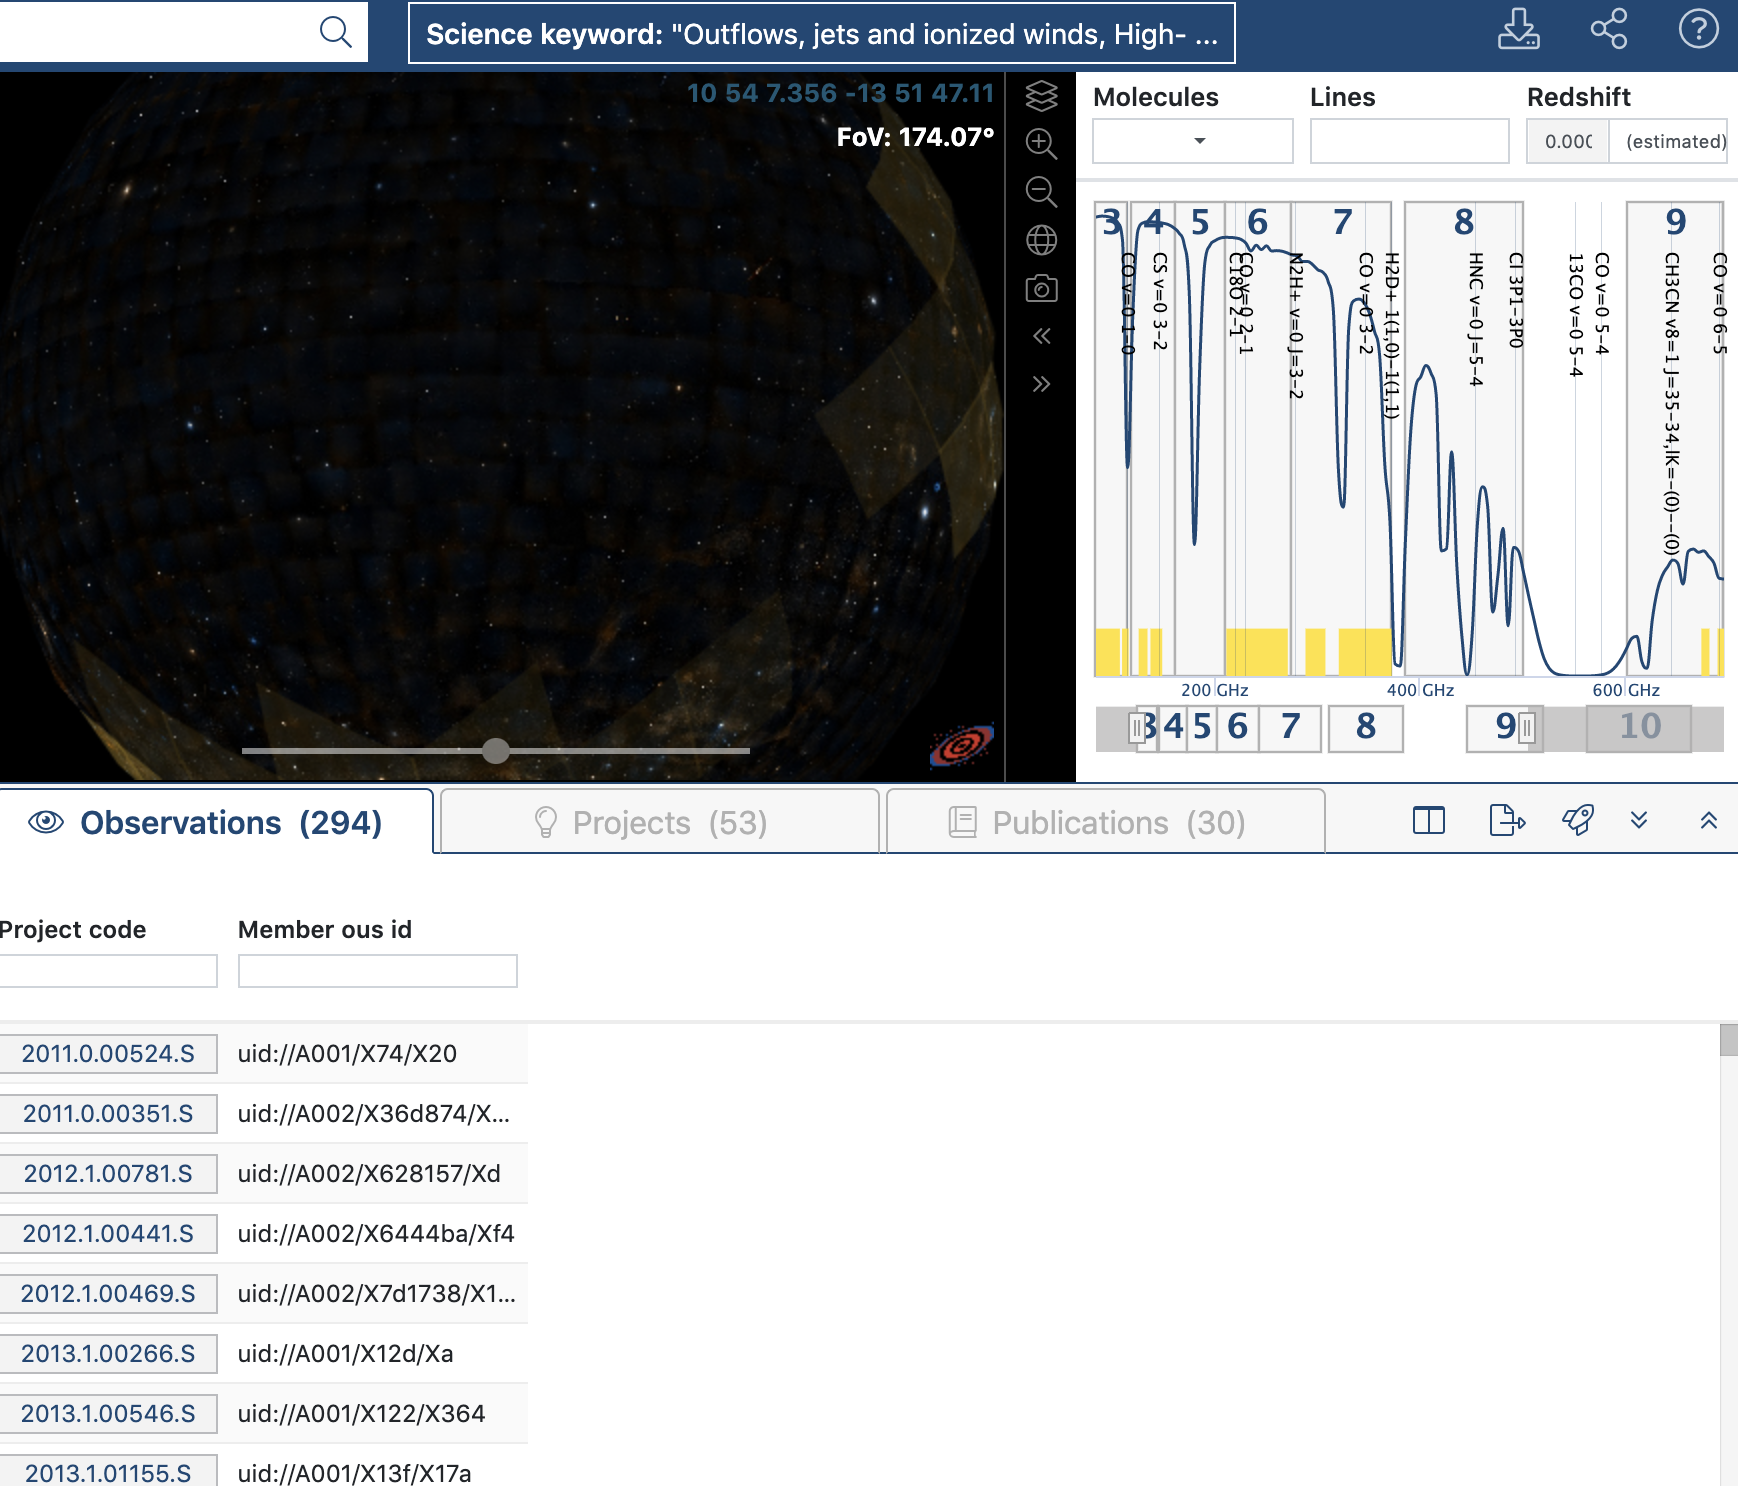

In [ ]:
all_mous = ...
links = alma.stage_data([all_mous], expand_tarfiles=True)['URL']
trimmed_links = []
for link in links:
    if 'cont' in link and 'fits.tar' in link: #'cont' will grab only the continuum files
        trimmed_links.append(link)
#alma.cache_location = '/big/external/drive/' # --> if you want to download to a specific directory
#alma.download_files(trimmed_links)

# BELOW MAY NOT WORK... 
*WAIT FOR ASTROQUERY/ ALMA ARCHIVE UPDATES*

### The ALMA Astroquery keywords

In [51]:
print('#####KEYWORDS')
Alma.help()
print('#####ADVANCED SEARCH KEYWORDS')
Alma.help_tap() # --> More elaborate queries


#####KEYWORDS

Most common ALMA query keywords are listed below. These keywords are part of the ALMA ObsCore model, an IVOA standard for metadata representation (3rd column). They were also present in original ALMA Web form and, for backwards compatibility can be accessed with their old names (2nd column).
More elaborate queries on the ObsCore model are possible with `query_sia` or `query_tap` methods
  Description                       Original ALMA keyword               ObsCore keyword                    
-------------------------------------------------------------------------------------------------------

Position
  Source name (astropy Resolver)    source_name_resolver                SkyCoord.from_name                 
  Source name (ALMA)                source_name_alma                    target_name                        
  RA Dec (Sexagesimal)              ra_dec                              s_ra, s_dec                        
  Galactic (Degrees)                galactic     

## A few searches
### A sample search based on keyword, resolution, and proposal year
Note: Science keywords for ALMA are listed [here](https://almascience.nrao.edu/proposing/proposers-guide#section-61)


In [52]:
## Query based on science keyword, resolution (related to "beamsize"), and proposal year (2016 in this case)
#mydict = {'science_keyword':['Outflows, jets and ionized winds','Disks around low-mass stars'],'spatial_resolution':'<0.2','proposal_id':'2016.*'}
mydict = {'science_keyword':'Disks around low-mass stars','spatial_resolution':'<0.2','proposal_id':'2016.*'}
myresults = Alma.query(payload=mydict)


In [53]:
myresults['target_name','s_ra','s_dec','proposal_id','band_list','scan_intent','dataproduct_type']


target_name,s_ra,s_dec,proposal_id,band_list,scan_intent,dataproduct_type
,deg,deg,,,,
bytes256,float64,float64,bytes64,bytes30,bytes256,bytes5
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
J0440+1437,70.08808040003528,14.632486600002956,2016.1.00158.S,7,CHECK WVR,cube
DR_Tau,71.77593244943604,16.978478356208004,2016.1.00158.S,7,TARGET,cube


### Another search based on "source name"
*Notice the differences ... be careful?*

In [54]:
mydict1 = {'band_list':'6','SkyCoord.from_name':'DG_Tau'} ## need to look into this "Source name (astropy Resolver)"
mydict2 = {'band_list':'6','target_name':'DGTau'}
myresults1 = Alma.query(payload=mydict1)
myresults2 = Alma.query(payload=mydict2)

In [55]:
myresults1['target_name','s_ra','s_dec','proposal_id','band_list','scan_intent','dataproduct_type']


target_name,s_ra,s_dec,proposal_id,band_list,scan_intent,dataproduct_type
,deg,deg,,,,
bytes256,float64,float64,bytes64,bytes30,bytes256,bytes5
J1717-3342,259.40012269599487,-33.702452133300106,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.40012269599487,-33.702452133300106,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.40012269599487,-33.702452133300106,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.40012269599487,-33.702452133300106,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.4001226960385,-33.702452133306764,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.4001226960385,-33.702452133306764,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.4001226960385,-33.702452133306764,2018.1.00659.L,6,PHASE WVR,cube
J1717-3342,259.4001226960385,-33.702452133306764,2018.1.00659.L,6,PHASE WVR,cube


In [56]:
myresults2['target_name','s_ra','s_dec','proposal_id','band_list','scan_intent','dataproduct_type']


target_name,s_ra,s_dec,proposal_id,band_list,scan_intent,dataproduct_type
,deg,deg,,,,
bytes256,float64,float64,bytes64,bytes30,bytes256,bytes5
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,image
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,image
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,cube
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,image
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,cube
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,cube
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,image
DGTau,66.76958333338001,26.104388888898175,2016.1.01042.S,6,TARGET,image


### Mask results from initial search, to further refine the search

In [57]:
# Include only scientific targets (not calibrators)
myresults_maskbyintent = (myresults['scan_intent']=='TARGET')
myresults_target = myresults[myresults_maskbyintent]

# Mask by source name
myresults_maskbyname = (myresults['target_name']=='DGTau') | (myresults['target_name']=='DG_TAU') | (myresults['target_name']=='DG_Tau')
myresults_name = myresults[myresults_maskbyname]

# Mask by product type
myresults_maskbytype = (myresults['dataproduct_type']=='image') 
myresults_type = myresults[myresults_maskbytype]

# Mask by source name and type
myresults_nametype = myresults[myresults_maskbyname & myresults_maskbytype]




In [58]:
myresults_nametype['target_name','s_ra','s_dec','proposal_id','band_list','scientific_category','science_keyword','scan_intent','dataproduct_type']


target_name,s_ra,s_dec,proposal_id,band_list,scientific_category,science_keyword,scan_intent,dataproduct_type
,deg,deg,,,,,,
bytes256,float64,float64,bytes64,bytes30,bytes200,bytes200,bytes256,bytes5
DGTau,66.76958333329125,26.104388888895862,2016.1.01042.S,6,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333329125,26.104388888895862,2016.1.01042.S,6,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333329125,26.104388888895862,2016.1.01042.S,6,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333329125,26.104388888895862,2016.1.01042.S,6,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333329125,26.104388888895862,2016.1.01042.S,6,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333330587,26.104388888892128,2016.1.01042.S,3,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333330587,26.104388888892128,2016.1.01042.S,3,Disks and planet formation,Disks around low-mass stars,TARGET,image
DGTau,66.76958333330587,26.104388888892128,2016.1.01042.S,3,Disks and planet formation,Disks around low-mass stars,TARGET,image


### Convert to a Pandas dataframe format
### Then write to CSV

In [59]:
mr=myresults.to_pandas()
mr['proposal_id'] = mr['proposal_id'].apply(lambda s: s.decode('utf-8')) #this is apparently necessary for some strings, which otherwise will be in quotes and with a leading b

/Users/aplunket/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: TableReplaceWarning: converted column 'publication_year' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


In [60]:
mr.to_csv('test.csv')